# <font color='royalblue' style='font-size: 30px;'>Calibração de medidor de ozônio (Dissertação de Mestrado)</font>

## Descrição e objetivos

Este notebook apresenta uma aplicação de modelo de aprendizado de máquina (regressão linear) para realização de previsões na área de química ambiental.

O contexto desta aplicação é o desenvolvimento de um novo método de análise química (Tubo de Difusão) para medir a concentração de ozônio na atmosfera, tópico de minha Dissertação de Mestrado no Instituto de Química - Unesp, campus Araraquara.

Os resultados do novo método foram comparados com os resultados do método de referência (UV) pelo uso de regressão linear.

O modelo produzido pode permitir dois tipos de previsões: 1) Prever o resultado do tubo de difusão quando se conhece o valor de referência ou 2) Prever o valor de referência (tido como o valor "real" da concentração de ozônio) quando apenas o resultado do tubo de difusão está disponível (conceito de curva de calibração na área de análises químicas).

Ambos os tipos de previsões foram desenvolvidos neste documento para exemplificar a aplicação típica de modelos de aprendizado de máquina em química ambiental, bem como salientar sua semelhança com resoluções de problemas de negócio pela aplicação de regressão linear.

#### Fonte dos dados

Os dados estão disponíveis na Dissertação de Mestrado, link: https://repositorio.unesp.br/handle/11449/97808 


#### Referência bibliográfica

Garcia, G. Construção e calibração de amostrador passivo para determinação de ozônio troposférico. Dissertação de Mestrado. Araraquara, 2009.


### Importando bibliotecas relevantes

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Carregando dados e construindo DataFrame adequado

In [116]:
dados = pd.read_excel('UV-analyser_x_difusão.xlsx', header=1)

In [117]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Referência       30 non-null     float64
 1   Tubo de difusão  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [122]:
dados.columns = ['Método referência (UV)', 'Novo método (Tubo de Difusão)']
dados

,Método referência (UV),Novo método (Tubo de Difusão)
0,6.6,6.5
1,11.4,9.8
2,12.6,9.6
3,13.2,14.3
4,18.5,17.4
5,19.8,16.3
6,20.6,20.6
7,21.2,22.2
8,23.4,23.5
9,24.0,27.2


### Avaliação estatística inicial dos dados

In [123]:
dados.describe().round(2)

,Método referência (UV),Novo método (Tubo de Difusão)
count,30.00,30.00
mean,29.11,27.70
std,11.64,10.81
min,6.60,6.50
25%,21.75,22.12
50%,28.60,27.05
75%,37.03,36.48
max,55.60,47.70


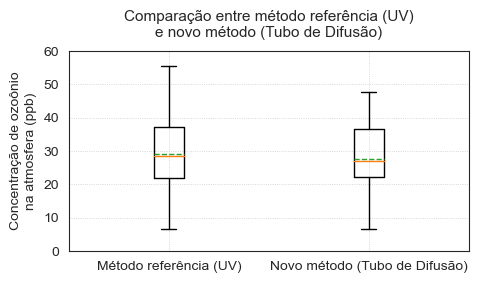

In [124]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_axes([0,0,1,1])

ax.boxplot(dados, meanline = True, showmeans = True, labels = dados.columns)

ax.set_title('Comparação entre método referência (UV)\ne novo método (Tubo de Difusão)', fontsize=11, zorder=2, pad=10)
ax.set_ylabel('Concentração de ozoônio\nna atmosfera (ppb)', fontsize=10, labelpad=5)
ax.grid(True, zorder=1, ls=':', lw=0.6)
ax.set_yticks([0, 10,20,30,40,50, 60])
ax=ax

plt.savefig('Caixas_distribuição_ambos_os_métodos.png', bbox_inches='tight')

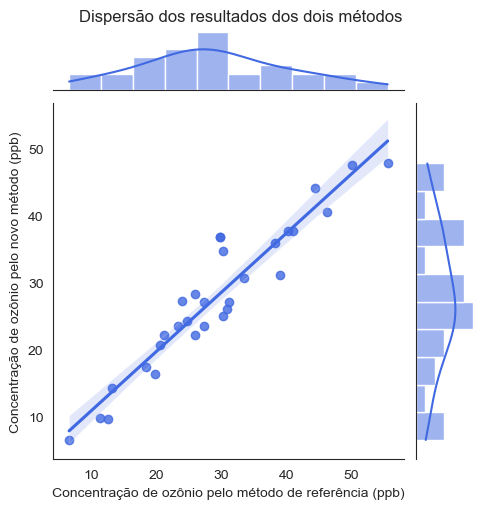

In [125]:
sns.set_style('white')

ax = sns.jointplot(x='Método referência (UV)', y='Novo método (Tubo de Difusão)',
                   data = dados, height=5, kind='reg', marginal_kws=dict(bins=10),
                  color='royalblue')
ax.fig.suptitle('Dispersão dos resultados dos dois métodos', fontsize = 12, y = 1.01)
ax.set_axis_labels(xlabel='Concentração de ozônio pelo método de referência (ppb)',
                  ylabel='Concentração de ozônio pelo novo método (ppb)', fontsize=10)
ax=ax

plt.savefig('Dispersão dos resultados.png', bbox_inches='tight')

### Construção do modelo de regressão linear

In [126]:
# Separando dados de treino e dados de teste

X = dados['Método referência (UV)']
y = dados['Novo método (Tubo de Difusão)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
type(X_test)

pandas.core.series.Series

In [127]:
# Confirmando tamanho dos dados de treino e teste
print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

24 6 24 6


In [129]:
# Convertendo 1D array (depois de mensagem de erro)

X_train_arr = X_train.values.reshape(-1, 1) 
X_test_arr = X_test.values.reshape(-1, 1)
y_train_arr = y_train.values.reshape(-1, 1)
y_test_arr = y_test.values.reshape(-1, 1)

In [130]:
# Criando modelo de regressão linear
                        
reg_lin = LinearRegression()
reg_lin.fit(X_train_arr, y_train_arr)

LinearRegression()

In [131]:
# Obtendo coeficientes do modelo de regressão linear

coef_ang = reg_lin.coef_[0,0].round(2)
coef_lin = reg_lin.intercept_[0].round(2)
R2_train = reg_lin.score(X_train_arr, y_train_arr).round(2)

print('Curva de calibração do novo método (Tubo de Difusão): Tubo = {}'.format(coef_ang) + ' * Ref. + {}'.format(coef_lin)
     + ' (R\u00b2 = {})'.format(R2_train))


Curva de calibração do novo método (Tubo de Difusão): Tubo = 0.93 * Ref. + 0.75 (R² = 0.89)


In [132]:
# Verificando performance do modelo com coeficiente de determinação e Raíz do Erro Quadrático Médio

y_previsto = reg_lin.predict(X_test_arr)
R2_test = metrics.r2_score(y_test_arr, y_previsto).round(2)
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)

pd.DataFrame([EQM, REQM, R2_test], ['EQM', 'REQM', 'R2'], columns = ['Métricas'])

,Métricas
EQM,16.94
REQM,4.12
R2,0.91


In [133]:
# Saída típica de regressão linear na área de química ambiental

dados_mod = dados
dados_mod['y_prev'] = reg_lin.predict(X.values.reshape(-1,1)).round(1)
dados_mod

,Método referência (UV),Novo método (Tubo de Difusão),y_prev
0,6.6,6.5,6.9
1,11.4,9.8,11.3
2,12.6,9.6,12.4
3,13.2,14.3,13.0
4,18.5,17.4,17.9
5,19.8,16.3,19.1
6,20.6,20.6,19.8
7,21.2,22.2,20.4
8,23.4,23.5,22.4
9,24.0,27.2,23.0


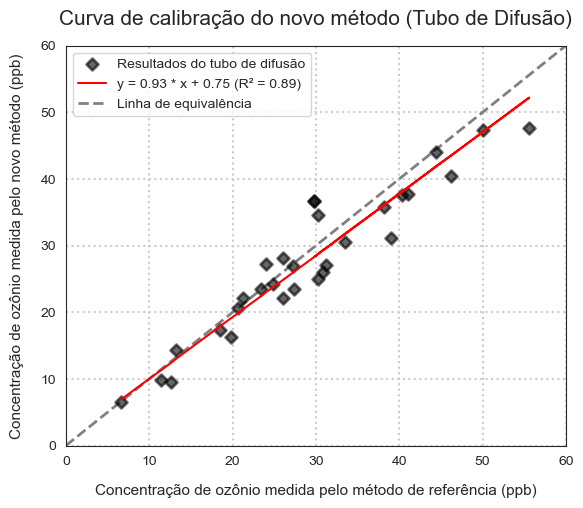

In [135]:
# Visualização típica de uma curva de calibração em química ambiental

fig = plt.figure(figsize = (5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.scatter(dados['Método referência (UV)'], dados['Novo método (Tubo de Difusão)'],
             marker='D', c='k', lw=2, zorder=3, alpha=0.6)

eixo.set_title('Curva de calibração do novo método (Tubo de Difusão)',
               fontsize=15, pad=15)
eixo.set_ylabel('Concentração de ozônio medida pelo novo método (ppb)', fontsize=11, labelpad=12)
eixo.set_xlabel('Concentração de ozônio medida pelo método de referência (ppb)', fontsize=11, labelpad=12)
eixo.set_ylim([0,60])
eixo.set_xlim([0,60])
eixo.grid(visible=True, lw='1.5', ls=':', zorder=1)

eixo.plot(dados_mod['Método referência (UV)'], dados['y_prev'],
          lw=1.5, zorder=4, color='r')

x_eq = [0,60]
y_eq = [0,60]

eixo.plot(x_eq, y_eq, lw=2, zorder=2, color='gray', ls='--')

eixo.legend(['Resultados do tubo de difusão','y = {}'.format(coef_ang) + ' * x + {}'.format(coef_lin)
             + ' (R\u00b2 = {})'.format(R2_train),'Linha de equivalência'])

eixo=eixo

fig.savefig('Curva_de_calibração_típica.png', bbox_inches = 'tight')

### Construindo previsões

In [136]:
# Previsão típica de modelos de regressão (variável dependente conhecida e variável independente a ser prevista)

referencia = 35.6

tubo_de_difusao = reg_lin.predict(np.array(referencia).reshape(-1,1)).round(1)

print('Quando a concentração de ozônio medida pelo método de referência (UV) for {}'.format(referencia)
     + ' ppb,\na concentração medida pelo tubo de difusão será {} ppb'.format(tubo_de_difusao[0,0]))

Quando a concentração de ozônio medida pelo método de referência (UV) for 35.6 ppb,
a concentração medida pelo tubo de difusão será 33.7 ppb


In [137]:
# Previsão típica de curvas de calibração (variável independente conhecida e variável dependente a ser estimada)

tubo_de_difusao2 = 45.2

referencia2 = round((tubo_de_difusao2 - coef_lin) / coef_ang, 1)

print('Quando a concentração de ozônio medida pelo tubo de difusão for {}'.format(tubo_de_difusao2)
     + ' ppb,\na concentração "real" de ozônio será {} ppb'.format(referencia2))

Quando a concentração de ozônio medida pelo tubo de difusão for 45.2 ppb,
a concentração "real" de ozônio será 47.8 ppb


### Observações finais

Tal aplicação de modelo de regressão linear permite a realização de previsões sobre a concentração de um poluente atmosférico.

Mas principalmente, também permite comparar a performance de um novo método recentemente desenvolvido com um método já bem conhecido e aceito pela indústria da qualidade do ar.

Esta mesma estrutura de análise estatística poderia ser replicada para resolução de diversos problemas de negócios em que hajam correlações lineares entre variáveis e que se deseje fazer previsões de cenários específicos.